# Part II - (Prsoper Loan Data)
## by Awaji-kansan Obediah Iduinung

## Investigation Overview


> My interest was to find how the the prosper rating is affected by employment status, loan status, and how it also relates to the original loan amount and the loan term. During the exploration, I found out that there is a direct relationship between the prosper rating, loan amount and term of the loan.


## Dataset Overview

>  worked on the Prsoper Loan Dataset which consists of 113,937 rowas and 81 columns. Some of the variables contained in the dataset are:Term, ListingCategory (numeric), CreditGrade, EstimatedReturn, Investors, StatedMonthlyIncome, AmountDelinquent, ProsperScore, LoanOriginalAmount, MonthlyLoanPayment, LoanStatus, BorrowerRate, ProsperRating (Alpha), LoanOriginationDate, EmploymentStatus, Occupation, IncomeRange.

In [11]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [12]:
#Load data
LoanData = pd.read_csv('prosperLoanData.csv')

In [13]:
#Select columns to explore
needed_columns = ['Term', 'ListingCategory (numeric)', 'CreditGrade', 'EstimatedReturn', 'Investors', 'StatedMonthlyIncome', 'AmountDelinquent', 'ProsperScore', 'LoanOriginalAmount', 'MonthlyLoanPayment', 'LoanStatus', 'BorrowerRate', 'ProsperRating (Alpha)', 'LoanOriginationDate', 'EmploymentStatus', 'Occupation', 'IncomeRange']

Target_LoanData = LoanData[needed_columns]
#Drop missing values in the ProsperRating (Alpha), AmountDelinquent, ProsperScore, EmploymentStatus, Occupation columns
Target_LoanData = Target_LoanData.dropna(subset=['ProsperRating (Alpha)', 'AmountDelinquent', 'ProsperScore', 'EmploymentStatus', 'Occupation']).reset_index()

#Convert datatype of LoanOriginationDate to datetime
Target_LoanData['LoanOriginationDate'] = pd.to_datetime(Target_LoanData['LoanOriginationDate'])



## Prosper score

> This plot shows an almost normal distribution of risk scores. While 1.0 is the lowest score, 4.0, 6.0, and 8.0 are the highest recorded scores

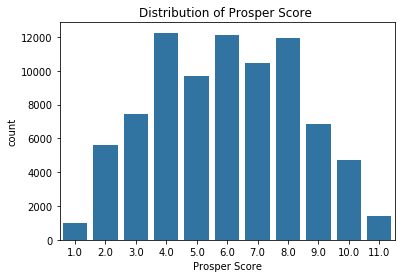

In [14]:
# Visualise the Prosper score
base_color = sb.color_palette()[0]
sb.countplot(data=Target_LoanData, x= 'ProsperScore', color=base_color)
plt.title('Distribution of Prosper Score ')
plt.xlabel('Prosper Score');

## Loan Prosper Rating

> Majority of the borrowers recieved a prosper rating of C while AA rating was recieved by the least number of borrowers

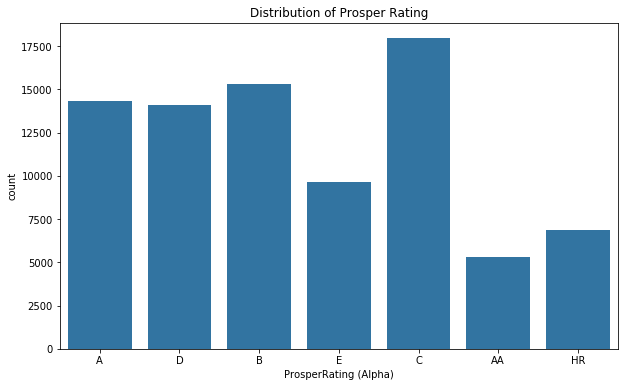

In [15]:
# Visualise the loan Prosper Rating Distribution

plt.figure(figsize=[10, 6]);
sb.countplot(data=Target_LoanData,x='ProsperRating (Alpha)', color=base_color);
plt.title('Distribution of Prosper Rating');

## Prosper rating vs employment status

> Employed people appear the most in all the rating categories. Most of the employed people recieved a C rating and the least number of employed people have the highest rating of AA. This pattern can be observed for all other employemnt status across the different catrgories of ratings.

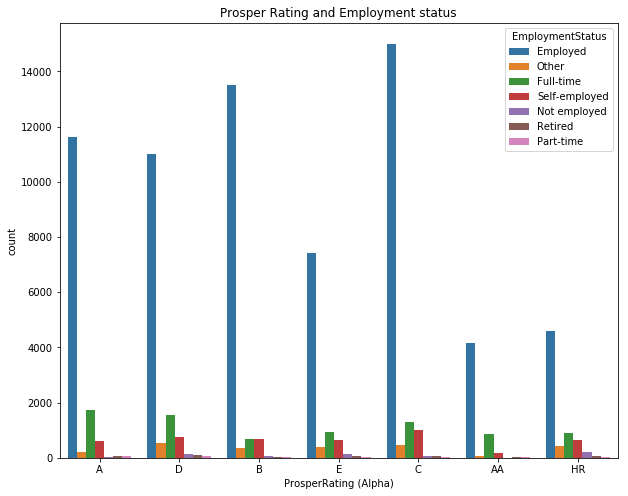

In [16]:
# Visualise the prosper rating vs the employment status
plt.figure(figsize = [10, 8])
sb.countplot(x ='ProsperRating (Alpha)', hue = 'EmploymentStatus', data = Target_LoanData);
plt.title('Prosper Rating and Employment status');

In [17]:
condition = (Target_LoanData['LoanStatus'] == 'Completed') | (Target_LoanData['LoanStatus'] == 'Defaulted') |\
                  (Target_LoanData['LoanStatus'] == 'Chargedoff')
Target_LoanData = Target_LoanData[condition]

def change_to_defaulted(row):
    if row['LoanStatus'] == 'Chargedoff':
        return 'Defaulted'
    else:
        return row['LoanStatus']
    
Target_LoanData['LoanStatus'] = Target_LoanData.apply(change_to_defaulted, axis=1)
categories = {1: 'Debt Consolidation', 2: 'Home Improvement', 3: 'Business', 6: 'Auto', 7: 'Other'}
def reduce_categorie(row):
    loan_category = row['ListingCategory (numeric)']
    if  loan_category in categories:
        return categories[loan_category]
    else:
        return categories[7]
    
Target_LoanData['ListingCategory (numeric)'] = Target_LoanData.apply(reduce_categorie, axis=1)

ref: https://github.com/Abhishek20182/Communicate-Data-Findings/blob/master/exploration.ipynb

## Prosper rating vs loan status

> Both the defaulted and completed loans have D as the highest rating. While A rating is he second highest recorded rating for completed loans, HR rating is the second highest for defaulted loans.

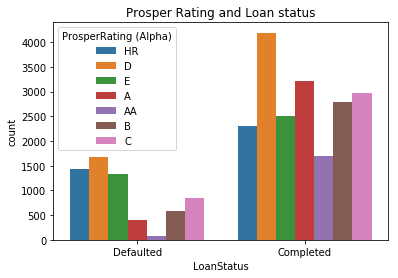

In [18]:
# Visualise theprosper rating vs loan status
sb.countplot(x ='LoanStatus', hue = 'ProsperRating (Alpha)', data = Target_LoanData);
plt.title('Prosper Rating and Loan status');

## Prosper Rating, Stated Monthly Income and Term of the loan

> No much interaction can be seen between Prosper rating and Term for the Stated monthly income unlike in the loan amount. At Prosper rating AA which is the highest rating, the loan amount for all three terms is highest.

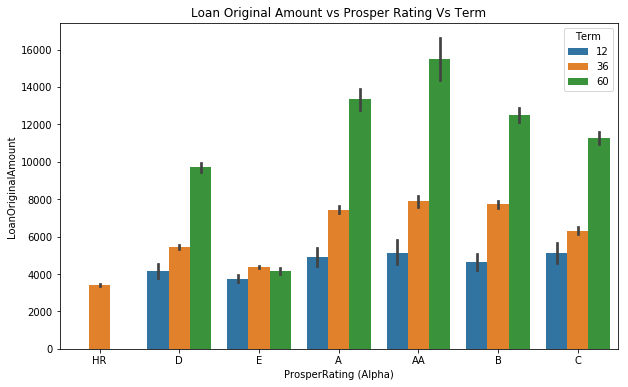

In [19]:
# visualise the Prosper Rating, Stated Monthly Income and Term of the loan
plt.figure(figsize = [10, 6])
sb.barplot(
    data=Target_LoanData,
    x='ProsperRating (Alpha)',
    y='LoanOriginalAmount',
    hue='Term');

plt.title('Loan Original Amount vs Prosper Rating Vs Term');

## Prosper Rating, Loan Original Amount and LoanStatus

> It can be observed here that defaulted loans have the highest loan amount across all the prosper rating category, except in HR

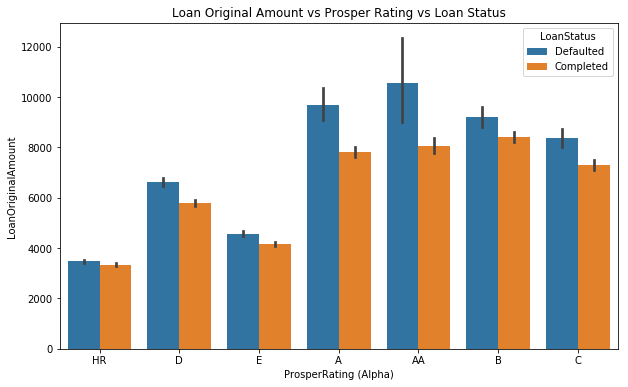

In [20]:
# visualise the Prosper Rating, Loan Original Amount and LoanStatus
plt.figure(figsize = [10, 6])
sb.barplot(
    x='ProsperRating (Alpha)', 
    y='LoanOriginalAmount', 
    data=Target_LoanData,
    hue='LoanStatus');
plt.title('Loan Original Amount vs Prosper Rating vs Loan Status');

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_II_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
